In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号
import warnings
warnings.filterwarnings("ignore") #关闭一些可能出现但对数据分析并无影响的警告

In [2]:
df_all = pd.read_csv('./业绩报表(处理后).csv')
df_all.describe()

,股票代码,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%)
count,30330.000000,30330.000000,30330.000000,3.033000e+04,3.033000e+04,30330.000000,3.033000e+04,30330.000000,30330.000000,30330.000000,30330.000000
mean,310932.575305,2019.392812,0.104732,2.860919e+09,2.701888e+08,1.459899,3.040507e+02,4.767525,-7.410804,27.612541,5.777964
std,257778.703318,2.546725,0.322760,1.893874e+10,2.649269e+09,40.513743,4.030857e+04,4.265736,1282.218435,78.024198,1599.308616
min,1.000000,2014.000000,-1.560000,-6.734960e+08,-1.986600e+10,-3227.140000,-1.552300e+02,-16.198293,-223304.680000,-9160.448279,-323.452800
25%,2501.000000,2017.000000,0.010000,1.438690e+08,4.251535e+06,0.298000,-5.981447e+00,2.453416,-0.160550,15.606354,-39.051250
50%,300550.000000,2020.000000,0.055000,3.754303e+08,2.251939e+07,1.440000,7.627252e+00,4.034299,-0.000189,26.042642,-16.411150
75%,600596.000000,2022.000000,0.140000,1.117786e+09,7.889947e+07,2.890000,3.128320e+01,6.168005,0.102497,38.901378,0.000000
max,605599.000000,2023.000000,31.392000,7.793680e+11,9.014500e+10,4574.050000,6.998082e+06,164.610216,258.033879,107.953278,220491.010500


In [3]:
df_all['股票代码'] = df_all['股票代码'].astype(str).str.zfill(6)
df_all

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,000001,平安银行,2015,0.37,1.610000e+10,5.054000e+09,4.41,49.046473,12.320464,4.380000,0.000000,8.4613,银行
1,000001,平安银行,2016,0.41,2.067100e+10,5.629000e+09,4.21,28.391304,11.965449,0.840000,0.000000,10.2101,银行
2,000001,平安银行,2017,0.35,2.753200e+10,6.086000e+09,3.70,33.191428,11.714291,3.450000,0.000000,10.0796,银行
3,000001,平安银行,2018,0.31,2.772600e+10,6.214000e+09,2.89,0.653785,10.936605,-6.700000,0.000000,7.6320,银行
4,000001,平安银行,2019,0.33,2.802600e+10,6.595000e+09,2.79,1.082017,11.848173,2.410000,0.000000,7.9875,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2.226248e+09,1.254836e+08,1.57,16.526084,10.418595,-1.064828,21.284541,-9.6345,化学制品
30326,605598,上海港湾,2022,0.32,1.795630e+08,4.130878e+07,0.00,0.000000,0.000000,0.000000,28.570304,-39.1641,工程建设
30327,605598,上海港湾,2023,0.61,2.434481e+08,1.052070e+08,7.89,35.578116,8.710901,1.167310,60.964504,66.4467,工程建设
30328,605599,菜百股份,2022,0.15,2.951667e+09,1.047314e+08,0.00,0.000000,0.000000,0.000000,11.893899,35.0358,珠宝首饰


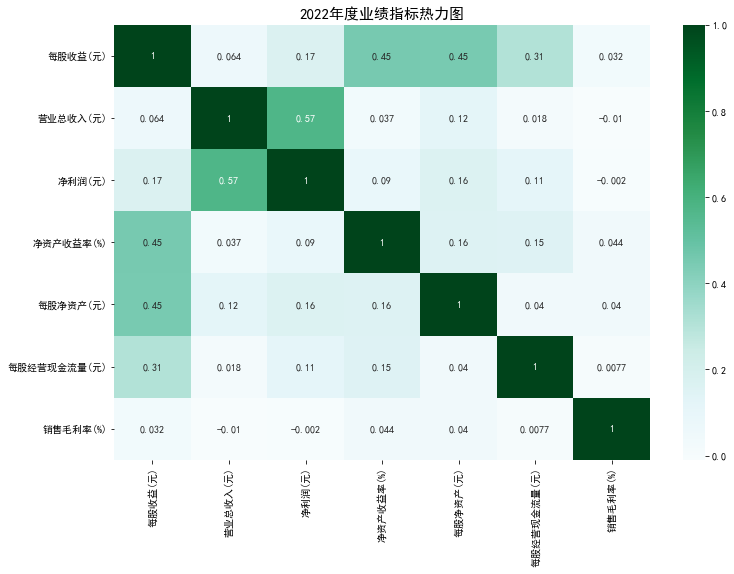

In [4]:
### 1.绘制多个指标的热力图，判断指标之间的相关性
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_all[df_all['年份'] == 2023]
interested_columns = ['每股收益(元)', '营业总收入(元)', '净利润(元)', '净资产收益率(%)','每股净资产(元)','每股经营现金流量(元)','销售毛利率(%)']

interested_data = df[interested_columns]

# 计算指标之间的相关系数
correlation_matrix = interested_data.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')
plt.title('2022年度业绩指标热力图',size = 15)
plt.show()


In [5]:
correlation_matrix

,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%)
每股收益(元),1.000000,0.064357,0.169172,0.452908,0.449480,0.307415,0.031686
营业总收入(元),0.064357,1.000000,0.570494,0.036590,0.123218,0.018009,-0.009961
净利润(元),0.169172,0.570494,1.000000,0.090131,0.161959,0.114479,-0.002046
净资产收益率(%),0.452908,0.036590,0.090131,1.000000,0.156510,0.153976,0.043502
每股净资产(元),0.449480,0.123218,0.161959,0.156510,1.000000,0.039579,0.039646
每股经营现金流量(元),0.307415,0.018009,0.114479,0.153976,0.039579,1.000000,0.007673
销售毛利率(%),0.031686,-0.009961,-0.002046,0.043502,0.039646,0.007673,1.000000


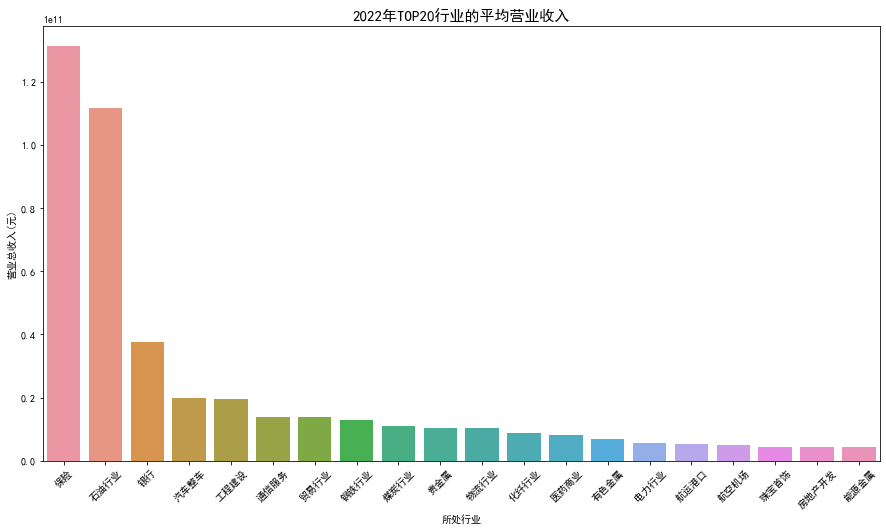

In [6]:
### 2. 绘制不同行业营业收入和净利润的统计情况
# 按行业进行分组，并计算营业总收入的均值
revenue_mean_by_industry = df.groupby('所处行业')['营业总收入(元)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='营业总收入(元)', ascending=False).head(20)

# 绘制柱状图
plt.figure(figsize=(15, 8))
sns.barplot(x='所处行业', y='营业总收入(元)', data=revenue_mean_df)
plt.title('2022年TOP20行业的平均营业收入',size = 15)
plt.xticks(rotation=45,size=10)
plt.show()

In [7]:
revenue_mean_df

,所处行业,营业总收入(元)
7,保险,1.312353e+11
59,石油行业,1.117046e+11
83,银行,3.770266e+10
40,汽车整车,1.977218e+10
30,工程建设,1.953982e+10
75,通信服务,1.393684e+10
73,贸易行业,1.379846e+10
81,钢铁行业,1.300817e+10
45,煤炭行业,1.108686e+10
72,贵金属,1.039234e+10


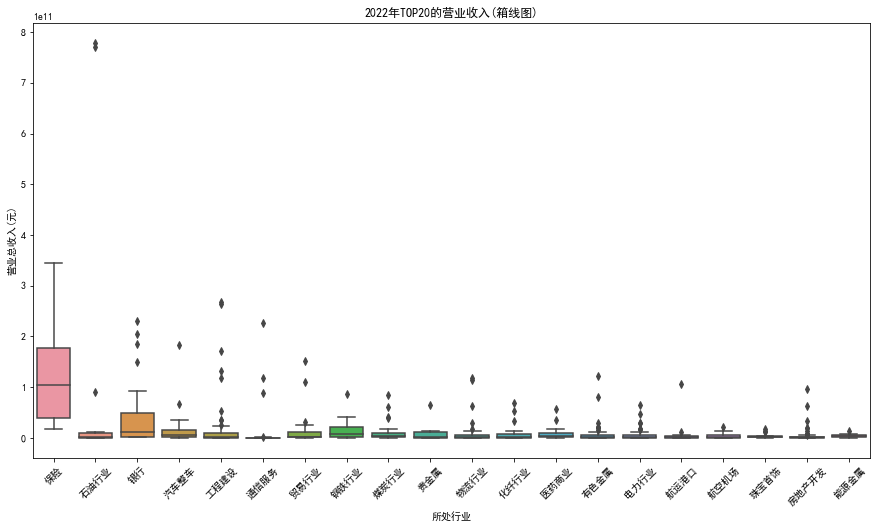

In [8]:
# 按行业进行分组，并计算营业总收入的均值
revenue_mean_by_industry = df.groupby('所处行业')['营业总收入(元)'].mean()

# 将分组结果转换为DataFrame
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='营业总收入(元)', ascending=False).head(20)
# 绘制箱线图
plt.figure(figsize=(15, 8))
sns.boxplot(x='所处行业', y='营业总收入(元)', data=df, order=revenue_mean_df['所处行业'])
plt.title('2022年TOP20的营业收入(箱线图)')
plt.xticks(rotation=45)
plt.show()


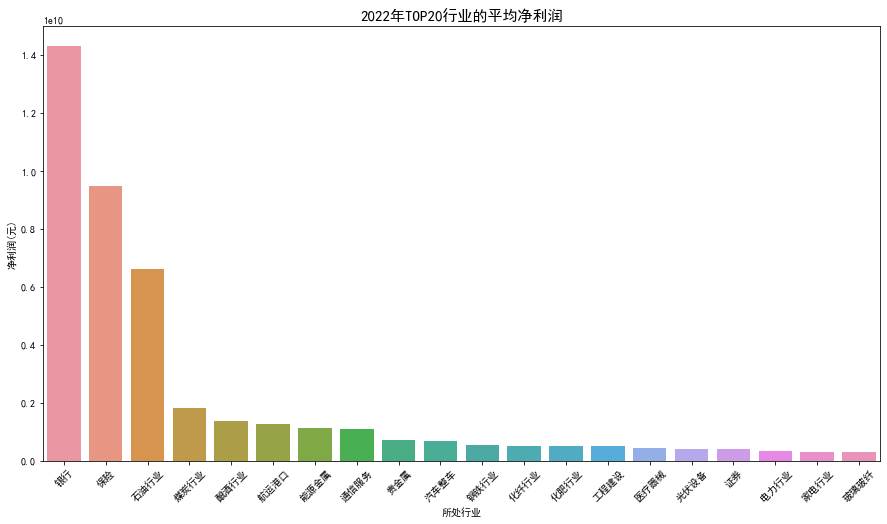

In [9]:
# 按行业进行分组，并计算净利润的均值
revenue_mean_by_industry = df.groupby('所处行业')['净利润(元)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='净利润(元)', ascending=False).head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x='所处行业', y='净利润(元)', data=revenue_mean_df)
plt.title('2022年TOP20行业的平均净利润',size = 15)
plt.xticks(rotation=45,size = 10)
plt.show()

In [10]:
revenue_mean_df

,所处行业,净利润(元)
83,银行,1.430248e+10
7,保险,9.492716e+09
59,石油行业,6.607531e+09
45,煤炭行业,1.796770e+09
79,酿酒行业,1.377010e+09
66,航运港口,1.276561e+09
63,能源金属,1.124556e+09
75,通信服务,1.100671e+09
72,贵金属,7.173661e+08
40,汽车整车,6.774696e+08


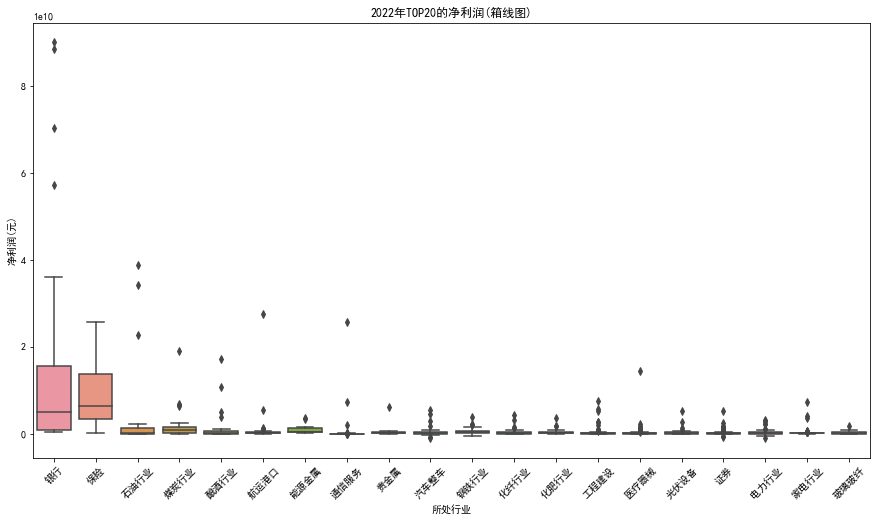

In [11]:
# 按行业进行分组，并计算净利润的均值
revenue_mean_by_industry = df.groupby('所处行业')['净利润(元)'].mean()

# 将分组结果转换为DataFrame
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='净利润(元)', ascending=False).head(20)
# 绘制箱线图
plt.figure(figsize=(15, 8))
sns.boxplot(x='所处行业', y='净利润(元)', data=df, order=revenue_mean_df['所处行业'])
plt.title('2022年TOP20的净利润(箱线图)')
plt.xticks(rotation=45)
plt.show()


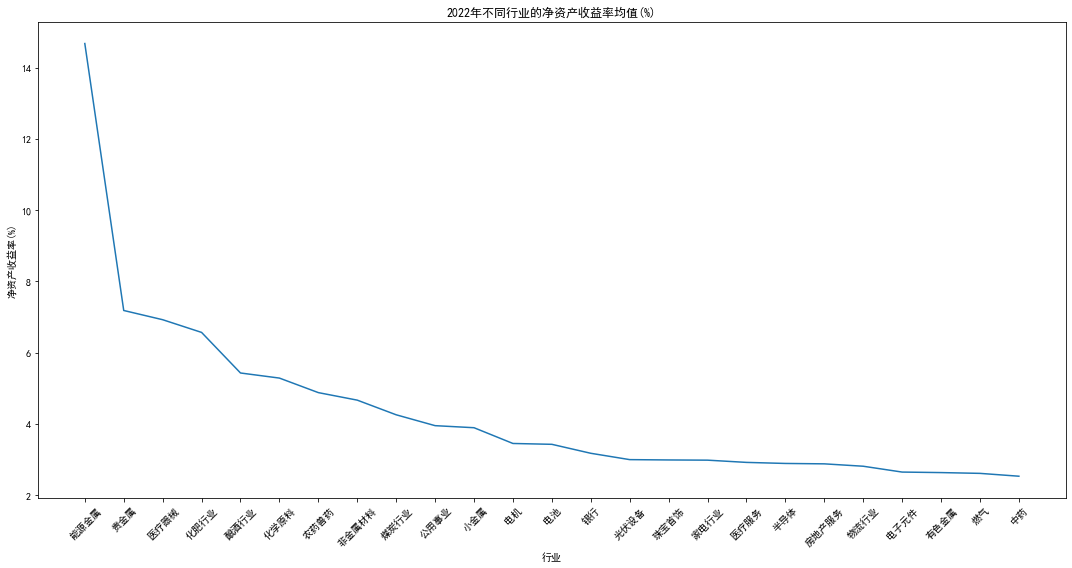

In [12]:
### 3.ROE排名
# 按行业进行分组，并计算净资产收益率的均值
roe_mean_by_industry = df.groupby('所处行业')['净资产收益率(%)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
roe_mean_df = pd.DataFrame(roe_mean_by_industry).reset_index()
roe_mean_df = roe_mean_df.sort_values(by='净资产收益率(%)', ascending=False).head(25)

plt.figure(figsize=(15, 8))
sns.lineplot(x='所处行业', y='净资产收益率(%)', data=roe_mean_df)
plt.title('2022年不同行业的净资产收益率均值(%)')
plt.xlabel('行业')
plt.ylabel('净资产收益率(%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
roe_mean_df

,所处行业,净资产收益率(%)
63,能源金属,14.672636
72,贵金属,7.182727
19,医疗器械,6.924032
18,化肥行业,6.567619
79,酿酒行业,5.429125
16,化学原料,5.286220
12,农药兽药,4.878432
84,非金属材料,4.667333
45,煤炭行业,4.256209
10,公用事业,3.951333


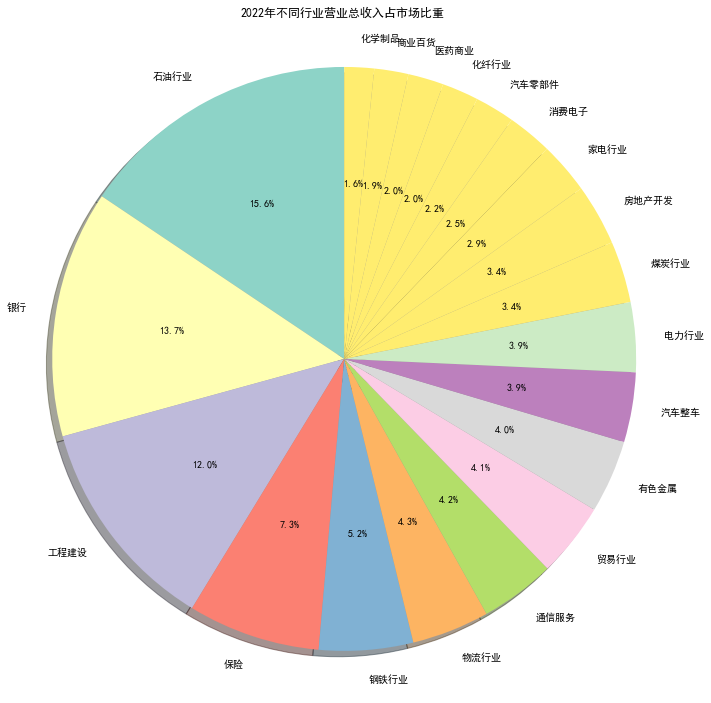

In [14]:
### 4.饼图展示不同行业的营业总收入占比
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'
revenue_sum_by_industry = df.groupby('所处行业')['营业总收入(元)'].sum()
top_20_industries = revenue_sum_by_industry.sort_values(ascending=False).head(20)

# 绘制饼图
plt.figure(figsize=(10, 10))
colors = plt.cm.Set3(range(len(top_20_industries)))
plt.pie(top_20_industries, labels=top_20_industries.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('2022年不同行业营业总收入占市场比重')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [15]:
top_20_industries

所处行业
石油行业     1.675569e+12
银行       1.470404e+12
工程建设     1.289628e+12
保险       7.874120e+11
钢铁行业     5.593514e+11
物流行业     4.618113e+11
通信服务     4.459789e+11
贸易行业     4.415506e+11
有色金属     4.342373e+11
汽车整车     4.152159e+11
电力行业     4.148088e+11
煤炭行业     3.658664e+11
房地产开发    3.644360e+11
家电行业     3.070472e+11
消费电子     2.675835e+11
汽车零部件    2.362824e+11
化纤行业     2.176894e+11
医药商业     2.114296e+11
商业百货     2.028751e+11
化学制品     1.768167e+11
Name: 营业总收入(元), dtype: float64

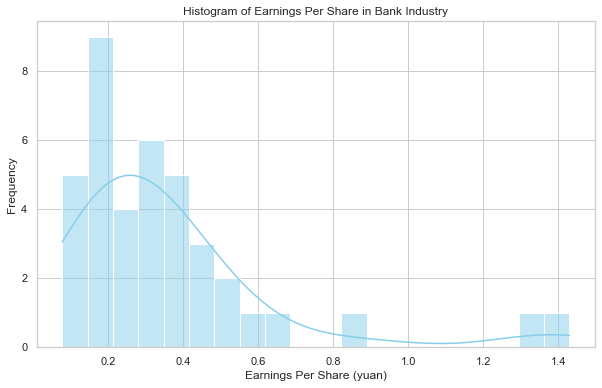

In [16]:
### 5.直方图观察指标分布情况
# 选择单一行业（例如银行）的每股收益数据
industry = '银行'
earnings_per_share = df[df['所处行业'] == industry]['每股收益(元)']

sns.set(style='whitegrid')

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(earnings_per_share, bins=20, kde=True, color='skyblue')
plt.xlabel('Earnings Per Share (yuan)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Earnings Per Share in Bank Industry')

plt.show()

In [17]:
earnings_per_share

8        0.5600
3450     0.0780
4726     0.8700
9844     0.1266
10477    0.1400
10537    0.1500
10583    0.1500
10614    0.2900
18912    0.6400
18993    0.3000
19002    0.3100
19157    1.4300
24697    0.2400
24728    0.3900
24737    0.5100
24747    0.1400
25163    0.5000
25293    0.3200
25441    0.2400
25512    1.3300
25521    0.3500
25670    0.4100
25713    0.2000
25756    0.3100
25857    0.2500
25910    0.2000
25943    0.4500
26104    0.2600
26111    0.1700
26318    0.1900
26325    0.3200
26360    0.1000
26480    0.2000
26537    0.3500
26567    0.4200
26619    0.1900
26673    0.4300
26682    0.3500
27984    0.1700
Name: 每股收益(元), dtype: float64

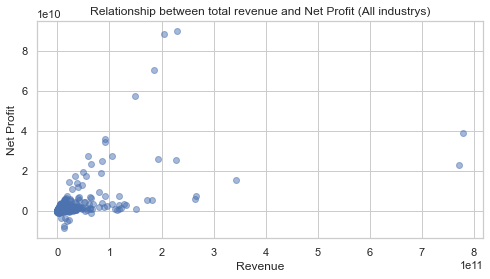

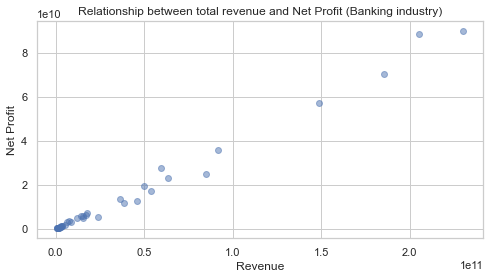

In [18]:
###
import matplotlib.pyplot as plt

# 整个数据集的散点图
plt.figure(figsize=(8, 4))
plt.scatter(df['营业总收入(元)'], df['净利润(元)'], alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Net Profit')
plt.title('Relationship between total revenue and Net Profit (All industrys)')
plt.show()

# 银行行业的散点图
bank_data = df[df['所处行业'] == '银行']
plt.figure(figsize=(8, 4))
plt.scatter(bank_data['营业总收入(元)'], bank_data['净利润(元)'], alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Net Profit')
plt.title('Relationship between total revenue and Net Profit (Banking industry)')
plt.show()


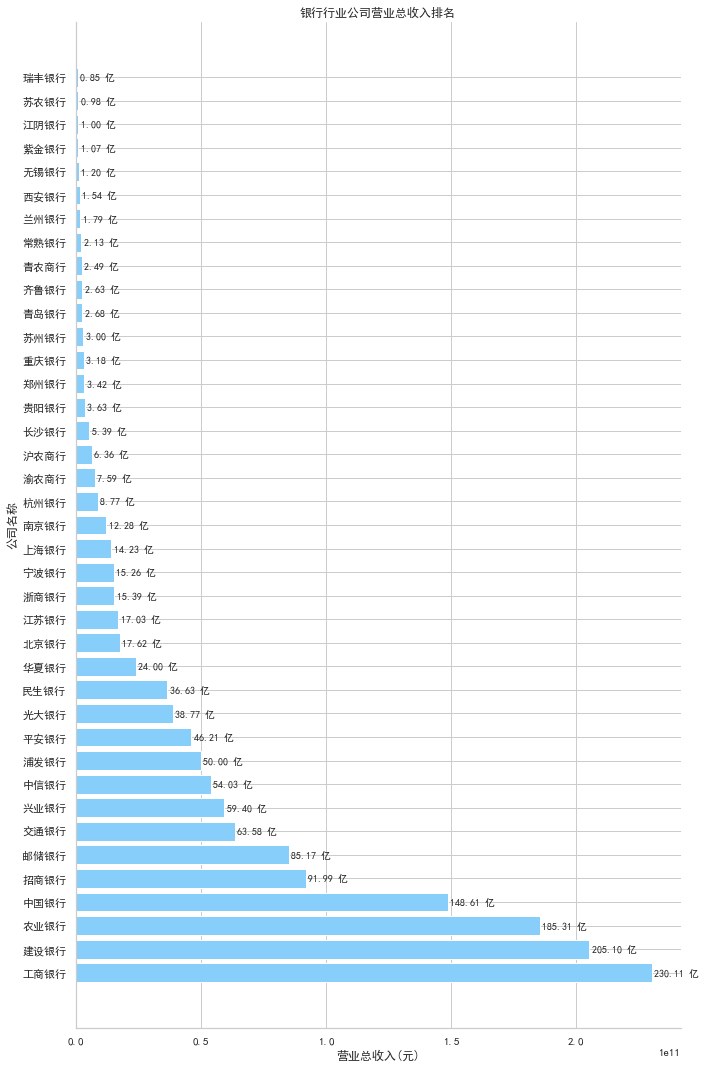

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'

# 选择所处行业为银行的公司
bank_df = df[df['所处行业'] == '银行']

# 按营业总收入降序排列
sorted_df = bank_df.sort_values('营业总收入(元)', ascending=False)

# 设置绘图参数
plt.figure(figsize=(10, 15))
plt.barh(sorted_df['股票简称'], sorted_df['营业总收入(元)'], color='#87CEFA')
plt.xlabel('营业总收入(元)')
plt.ylabel('公司名称')
plt.title('银行行业公司营业总收入排名')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(sorted_df['营业总收入(元)']):
    plt.text(v + 1e9, i, f'{v/1e9:.2f} 亿', va='center', fontsize=10)

plt.tight_layout()
plt.show()


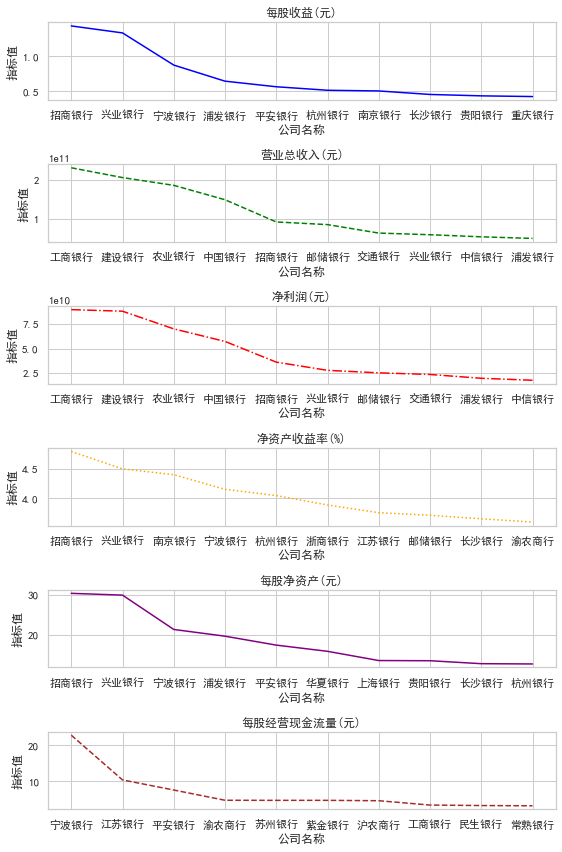

In [20]:
bank_data = df[df['所处行业'] == '银行']
# 提取需要绘制的指标列
indicators = ['每股收益(元)', '营业总收入(元)', '净利润(元)', '净资产收益率(%)', '每股净资产(元)', '每股经营现金流量(元)']
fig, axes = plt.subplots(nrows=len(indicators), ncols=1, figsize=(8, 12))
line_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
line_styles = ['-', '--', '-.', ':', '-', '--']
for i, ax in enumerate(axes):
    col_name = indicators[i]
    data = bank_data.sort_values(col_name, ascending=False)[col_name][:10]
    x = bank_data.sort_values(col_name, ascending=False)['股票简称'][:10]
    ax.plot(x, data, color=line_colors[i], linestyle=line_styles[i])
    ax.set_title(col_name)
    ax.set_xlabel('公司名称')
    ax.set_ylabel('指标值')

plt.tight_layout()

plt.show()


In [21]:
data = df_all
data

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,000001,平安银行,2015,0.37,1.610000e+10,5.054000e+09,4.41,49.046473,12.320464,4.380000,0.000000,8.4613,银行
1,000001,平安银行,2016,0.41,2.067100e+10,5.629000e+09,4.21,28.391304,11.965449,0.840000,0.000000,10.2101,银行
2,000001,平安银行,2017,0.35,2.753200e+10,6.086000e+09,3.70,33.191428,11.714291,3.450000,0.000000,10.0796,银行
3,000001,平安银行,2018,0.31,2.772600e+10,6.214000e+09,2.89,0.653785,10.936605,-6.700000,0.000000,7.6320,银行
4,000001,平安银行,2019,0.33,2.802600e+10,6.595000e+09,2.79,1.082017,11.848173,2.410000,0.000000,7.9875,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2.226248e+09,1.254836e+08,1.57,16.526084,10.418595,-1.064828,21.284541,-9.6345,化学制品
30326,605598,上海港湾,2022,0.32,1.795630e+08,4.130878e+07,0.00,0.000000,0.000000,0.000000,28.570304,-39.1641,工程建设
30327,605598,上海港湾,2023,0.61,2.434481e+08,1.052070e+08,7.89,35.578116,8.710901,1.167310,60.964504,66.4467,工程建设
30328,605599,菜百股份,2022,0.15,2.951667e+09,1.047314e+08,0.00,0.000000,0.000000,0.000000,11.893899,35.0358,珠宝首饰


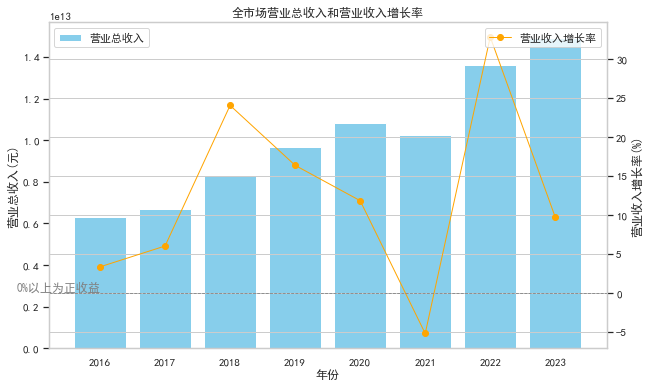

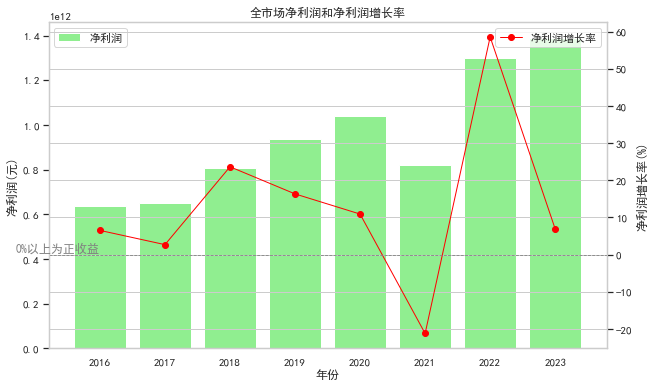

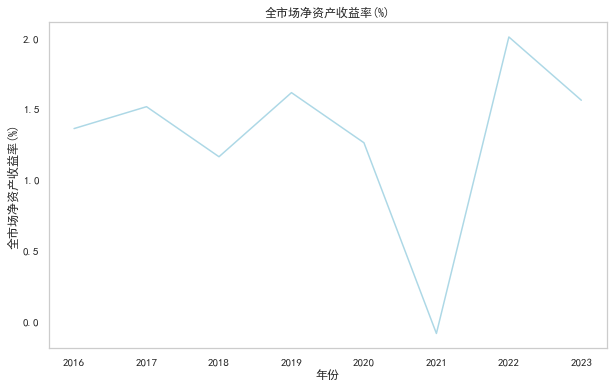

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# # 将年份作为索引
# data.set_index('年份', inplace=True)

# 按年份进行分组，并计算指标的均值和总和
grouped_data = data.groupby('年份').agg({'营业总收入(元)': 'sum', '净利润(元)': 'sum', '净资产收益率(%)': 'mean', '同比增长(%)': 'mean'})

# 计算增长率
grouped_data['营业收入增长率(%)'] = grouped_data['营业总收入(元)'].pct_change() * 100
grouped_data['净利润增长率(%)'] = grouped_data['净利润(元)'].pct_change() * 100

# 去除第一年的增长率数据
grouped_data = grouped_data.iloc[2:]

# 绘制营业收入和营业收入增长率的图表
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制营业总收入柱状图
ax1.bar(grouped_data.index, grouped_data['营业总收入(元)'], color='skyblue', label='营业总收入')

# 绘制营业收入增长率折线图
ax2.plot(grouped_data.index, grouped_data['营业收入增长率(%)'], color='orange', marker='o', linestyle='-', linewidth=1, label='营业收入增长率')

# 添加增长率为0%的基准线
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax2.text(grouped_data.index[0], 0, '0%以上为正收益', color='gray', ha='right', va='bottom')

ax1.set_xlabel('年份')
ax1.set_ylabel('营业总收入(元)')
ax2.set_ylabel('营业收入增长率(%)')
ax1.set_title('全市场营业总收入和营业收入增长率')

ax1.grid(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 绘制净利润和净利润增长率的图表
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制净利润柱状图
ax1.bar(grouped_data.index, grouped_data['净利润(元)'], color='lightgreen', label='净利润')

# 绘制净利润增长率折线图
ax2.plot(grouped_data.index, grouped_data['净利润增长率(%)'], color='red', marker='o', linestyle='-', linewidth=1, label='净利润增长率')

# 添加增长率为0%的基准线
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax2.text(grouped_data.index[0], 0, '0%以上为正收益', color='gray', ha='right', va='bottom')

ax1.set_xlabel('年份')
ax1.set_ylabel('净利润(元)')
ax2.set_ylabel('净利润增长率(%)')
ax1.set_title('全市场净利润和净利润增长率')

ax1.grid(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 绘制ROE的折线图
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['净资产收益率(%)'], color='lightblue')
plt.xlabel('年份')
plt.ylabel('全市场净资产收益率(%)')
plt.title('全市场净资产收益率(%)')

plt.grid(False)
plt.show()


#### 使用线性回归模型预测营业总收入

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 选择需要预测的指标和年份范围
target_variable = '营业总收入(元)'
start_year = 2018
end_year = 2025

# 准备训练数据和预测数据
X_train = grouped_data.index.values.reshape(-1, 1)
y_train = grouped_data[target_variable].values

X_pred = np.arange(start_year, end_year + 1).reshape(-1, 1)

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_pred)

# 打印预测结果
for year, value in zip(X_pred.flatten(), y_pred):
    print(f'预测年份：{year}，预测{target_variable}：{value}')


预测年份：2018，预测营业总收入(元)：8249628676961.0
预测年份：2019，预测营业总收入(元)：9461738486272.5
预测年份：2020，预测营业总收入(元)：10673848295583.5
预测年份：2021，预测营业总收入(元)：11885958104894.5
预测年份：2022，预测营业总收入(元)：13098067914206.0
预测年份：2023，预测营业总收入(元)：14310177723517.5
预测年份：2024，预测营业总收入(元)：15522287532828.5
预测年份：2025，预测营业总收入(元)：16734397342139.5


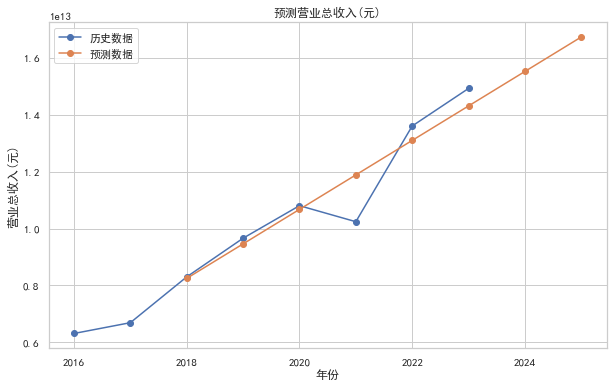

In [24]:
import matplotlib.pyplot as plt

# 绘制预测结果图表
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data[target_variable], label='历史数据', marker='o')
plt.plot(X_pred.flatten(), y_pred, label='预测数据', marker='o')
plt.xlabel('年份')
plt.ylabel(target_variable)
plt.title(f'预测{target_variable}')

plt.legend()
plt.grid(True)
plt.show()


#### 使用随机森林模型预测每股收益

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取数据集

data_forest = pd.read_csv('./业绩报表(处理后).csv')
data = data_forest

# 选择特征和目标变量
features = ['营业总收入(元)', '净利润(元)', '净资产收益率(%)', '同比增长(%)']
target = '每股收益(元)'

# 去除缺失值
data = data.dropna(subset=[target] + features)

# 划分训练集和测试集
train_data = data[data['年份'] < 2023]
test_data = data[data['年份'] == 2023]

# 创建模型
model = RandomForestRegressor()

# 拟合模型
model.fit(train_data[features], train_data[target])

# 进行预测
predictions = model.predict(test_data[features])

# 将预测结果放入数据集
test_data['预测每股收益'] = predictions

# 计算均方误差
mse = mean_squared_error(test_data[target], test_data['预测每股收益'])
print("均方误差(MSE):", mse)



均方误差(MSE): 0.21303871841222152


In [26]:
test_data

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业,预测每股收益
8,1,平安银行,2023,0.5600,4.620700e+10,1.285000e+10,3.27,10.574806,17.326136,7.580000,0.000000,9.5134,银行,0.308220
17,2,万科A,2023,0.1229,6.266707e+10,1.429295e+09,0.60,0.647209,20.375278,-1.140538,18.874781,-65.4369,房地产开发,0.083937
26,6,深振业A,2023,0.0329,3.513922e+08,4.443195e+07,0.58,-61.733943,5.696326,-0.090588,46.982195,-55.3106,房地产开发,0.039308
35,8,神州高铁,2023,-0.0189,2.155852e+08,-5.134018e+07,-1.11,44.408420,1.853004,0.022485,41.554463,-81.6051,交运设备,-0.048202
44,9,中国宝安,2023,0.0640,5.693657e+09,1.651342e+08,2.04,53.260302,3.173143,-0.183807,24.694564,5.4469,综合行业,0.119649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30318,605580,恒盛能源,2023,0.2000,1.893398e+08,4.056710e+07,4.68,9.500287,4.438915,-0.062906,30.038930,-27.9219,电力行业,0.172234
30320,605588,冠石科技,2023,0.4200,3.716025e+08,2.294661e+07,5.92,89.576198,7.283276,-1.355555,13.151340,6.6762,半导体,0.313615
30325,605589,圣泉集团,2023,0.1600,2.226248e+09,1.254836e+08,1.57,16.526084,10.418595,-1.064828,21.284541,-9.6345,化学制品,0.091761
30327,605598,上海港湾,2023,0.6100,2.434481e+08,1.052070e+08,7.89,35.578116,8.710901,1.167310,60.964504,66.4467,工程建设,0.319532


### 互联网服务行业时间序列数据研究

In [27]:
data = pd.read_csv('./业绩报表(处理后).csv')
data

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,1,平安银行,2015,0.37,1.610000e+10,5.054000e+09,4.41,49.046473,12.320464,4.380000,0.000000,8.4613,银行
1,1,平安银行,2016,0.41,2.067100e+10,5.629000e+09,4.21,28.391304,11.965449,0.840000,0.000000,10.2101,银行
2,1,平安银行,2017,0.35,2.753200e+10,6.086000e+09,3.70,33.191428,11.714291,3.450000,0.000000,10.0796,银行
3,1,平安银行,2018,0.31,2.772600e+10,6.214000e+09,2.89,0.653785,10.936605,-6.700000,0.000000,7.6320,银行
4,1,平安银行,2019,0.33,2.802600e+10,6.595000e+09,2.79,1.082017,11.848173,2.410000,0.000000,7.9875,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2.226248e+09,1.254836e+08,1.57,16.526084,10.418595,-1.064828,21.284541,-9.6345,化学制品
30326,605598,上海港湾,2022,0.32,1.795630e+08,4.130878e+07,0.00,0.000000,0.000000,0.000000,28.570304,-39.1641,工程建设
30327,605598,上海港湾,2023,0.61,2.434481e+08,1.052070e+08,7.89,35.578116,8.710901,1.167310,60.964504,66.4467,工程建设
30328,605599,菜百股份,2022,0.15,2.951667e+09,1.047314e+08,0.00,0.000000,0.000000,0.000000,11.893899,35.0358,珠宝首饰


In [28]:
data = data[data['所处行业'] == '互联网服务']
data = data.reset_index(drop = True)
data

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,409,云鼎科技,2015,0.0400,8.675491e+07,17884476.66,1.670,31.684637,2.287184,-0.084900,58.712235,-42.7358,互联网服务
1,409,云鼎科技,2016,-0.0600,5.982833e+07,-26018419.42,-2.550,-31.037532,2.127832,-0.065892,15.870154,27.7410,互联网服务
2,409,云鼎科技,2017,0.0100,5.744578e+08,5505142.26,0.490,860.176848,2.401684,-0.108096,14.488121,-62.6146,互联网服务
3,409,云鼎科技,2018,-0.0600,3.480253e+08,-28972927.81,-3.140,-39.416725,1.918336,0.000543,14.124910,205.5410,互联网服务
4,409,云鼎科技,2019,-0.1593,3.388847e+08,-81399552.30,-12.120,-2.626415,1.235209,-0.027971,4.042748,1711.4458,互联网服务
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,603918,金桥信息,2022,0.0090,1.636968e+08,3565228.62,0.492,124.948390,3.811887,-0.197402,34.025969,-65.5796,互联网服务
816,603918,金桥信息,2023,-0.0190,1.114394e+08,-6846311.50,-0.611,-31.923273,3.000008,-0.206083,34.081594,-77.7695,互联网服务
817,605398,新炬网络,2021,0.2700,8.086736e+07,11997793.79,3.600,0.000000,0.000000,0.000000,40.443059,0.0000,互联网服务
818,605398,新炬网络,2022,0.2000,9.954418e+07,10774745.48,1.410,23.095627,15.822985,-1.466343,41.874163,-47.5461,互联网服务


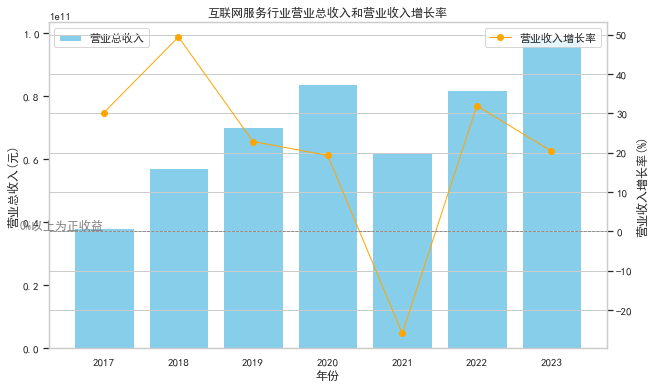

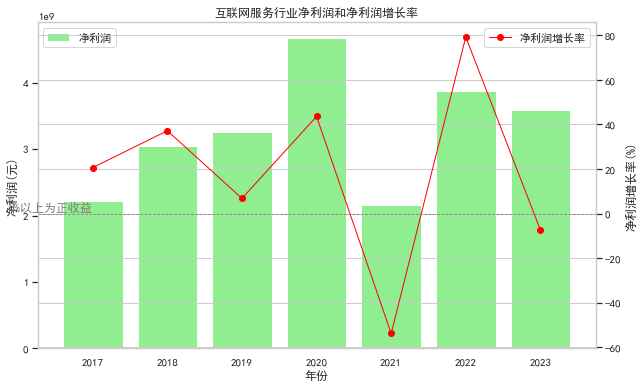

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# # 将年份作为索引
# data.set_index('年份', inplace=True)

# 按年份进行分组，并计算指标的均值和总和
grouped_data = data.groupby('年份').agg({'营业总收入(元)': 'sum', '净利润(元)': 'sum', '净资产收益率(%)': 'mean', '同比增长(%)': 'mean'})

# 计算增长率
grouped_data['营业收入增长率(%)'] = grouped_data['营业总收入(元)'].pct_change() * 100
grouped_data['净利润增长率(%)'] = grouped_data['净利润(元)'].pct_change() * 100

# 去除第一年的增长率数据
grouped_data = grouped_data.iloc[2:]

# 绘制营业收入和营业收入增长率的图表
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制营业总收入柱状图
ax1.bar(grouped_data.index, grouped_data['营业总收入(元)'], color='skyblue', label='营业总收入')

# 绘制营业收入增长率折线图
ax2.plot(grouped_data.index, grouped_data['营业收入增长率(%)'], color='orange', marker='o', linestyle='-', linewidth=1, label='营业收入增长率')

# 添加增长率为0%的基准线
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax2.text(grouped_data.index[0], 0, '0%以上为正收益', color='gray', ha='right', va='bottom')

ax1.set_xlabel('年份')
ax1.set_ylabel('营业总收入(元)')
ax2.set_ylabel('营业收入增长率(%)')
ax1.set_title('互联网服务行业营业总收入和营业收入增长率')

ax1.grid(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 绘制净利润和净利润增长率的图表
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制净利润柱状图
ax1.bar(grouped_data.index, grouped_data['净利润(元)'], color='lightgreen', label='净利润')

# 绘制净利润增长率折线图
ax2.plot(grouped_data.index, grouped_data['净利润增长率(%)'], color='red', marker='o', linestyle='-', linewidth=1, label='净利润增长率')

# 添加增长率为0%的基准线
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax2.text(grouped_data.index[0], 0, '0%以上为正收益', color='gray', ha='right', va='bottom')

ax1.set_xlabel('年份')
ax1.set_ylabel('净利润(元)')
ax2.set_ylabel('净利润增长率(%)')
ax1.set_title('互联网服务行业净利润和净利润增长率')

ax1.grid(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



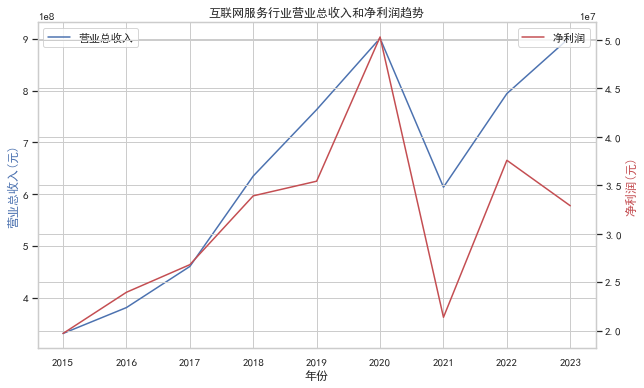

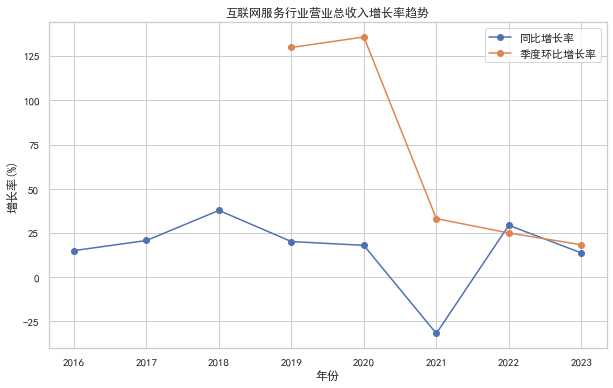

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 筛选互联网服务行业的数据
internet_industry = data[data['所处行业'] == '互联网服务']

# 按年份分组计算营业总收入和净利润的均值
mean_revenue = internet_industry.groupby('年份')['营业总收入(元)'].mean()
mean_profit = internet_industry.groupby('年份')['净利润(元)'].mean()

# 计算同比增长率和季度环比增长率
yearly_growth = mean_revenue.pct_change(periods=1) * 100
quarterly_growth = mean_revenue.pct_change(periods=4) * 100

# 创建图表和两个坐标轴
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制营业总收入和净利润的趋势图
ax1.plot(mean_revenue.index, mean_revenue.values, 'b-', label='营业总收入')
ax2.plot(mean_profit.index, mean_profit.values, 'r-', label='净利润')

# 设置坐标轴标签
ax1.set_xlabel('年份')
ax1.set_ylabel('营业总收入(元)', color='b')
ax2.set_ylabel('净利润(元)', color='r')

# 设置标题和图例
plt.title('互联网服务行业营业总收入和净利润趋势')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()

# 绘制同比增长率和季度环比增长率的趋势图
plt.figure(figsize=(10, 6))
plt.plot(yearly_growth.index[1:], yearly_growth.values[1:], marker='o', label='同比增长率')
plt.plot(quarterly_growth.index[4:], quarterly_growth.values[4:], marker='o', label='季度环比增长率')
plt.xlabel('年份')
plt.ylabel('增长率(%)')
plt.title('互联网服务行业营业总收入增长率趋势')
plt.legend()
plt.show()


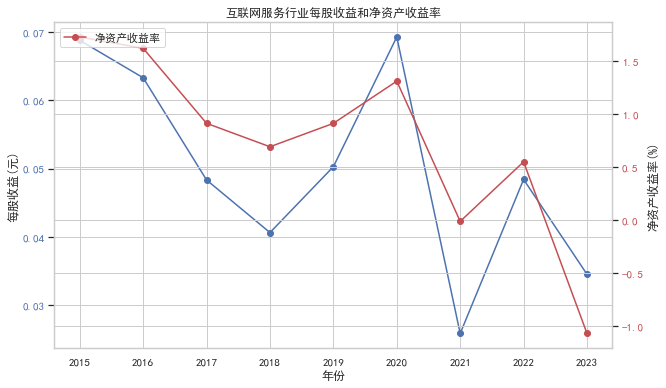

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# 筛选互联网服务行业的数据
internet_industry = data[data['所处行业'] == '互联网服务']

# 按年份分组计算每股收益和净资产收益率的均值
mean_eps = internet_industry.groupby('年份')['每股收益(元)'].mean()
mean_roe = internet_industry.groupby('年份')['净资产收益率(%)'].mean()

# 创建图表
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制每股收益的折线图
ax1.plot(mean_eps.index, mean_eps.values, color='b', marker='o', label='每股收益')
ax1.set_ylabel('每股收益(元)')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个坐标轴
ax2 = ax1.twinx()
ax2.plot(mean_roe.index, mean_roe.values, color='r', marker='o', label='净资产收益率')
ax2.set_ylabel('净资产收益率(%)')
ax2.tick_params(axis='y', labelcolor='r')

# 设置横轴标签
ax1.set_xlabel('年份')

# 设置标题和图例
plt.title('互联网服务行业每股收益和净资产收益率')
plt.legend(loc='upper left')

# 显示图表
plt.show()


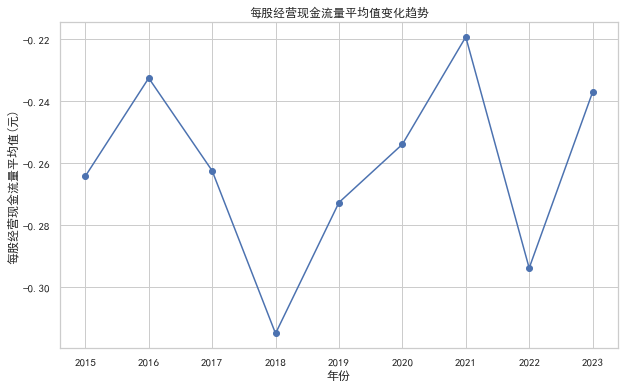

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 按年份分组并计算每股经营现金流量的平均值
average_cash_flow_per_share = data.groupby('年份')['每股经营现金流量(元)'].mean()

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制折线图
years = average_cash_flow_per_share.index
cash_flow = average_cash_flow_per_share.values
plt.plot(years, cash_flow, marker='o', linestyle='-')
plt.xlabel('年份')
plt.ylabel('每股经营现金流量平均值(元)')
plt.title('每股经营现金流量平均值变化趋势')

# 显示图形
plt.show()

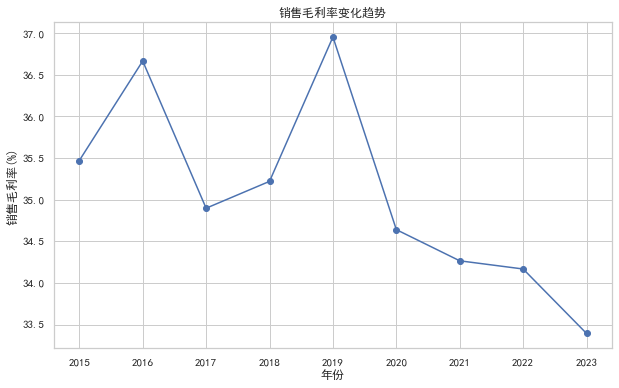

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 按年份和行业分组，并计算销售毛利率的平均值
average_gross_profit_margin = data.groupby(['年份', '所处行业'])['销售毛利率(%)'].mean().reset_index()

# 绘制折线图
years = average_gross_profit_margin['年份']
gross_profit_margin = average_gross_profit_margin['销售毛利率(%)']

# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(years, gross_profit_margin, marker='o', linestyle='-')
plt.xlabel('年份')
plt.ylabel('销售毛利率(%)')
plt.title('销售毛利率变化趋势')

# 显示图形
plt.show()
